# Temperature Forecast Project using ML

#### Project Description :  
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


#### Attribute Information:     
1. station - used weather station number: 1 to 25   
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')   
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6  
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9  
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5  
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100  
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5  
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6  
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9  
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4  
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97  
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97  
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98  
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97  
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7  
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6  
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8  
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7  
19. lat - Latitude (Â°): 37.456 to 37.645  
20. lon - Longitude (Â°): 126.826 to 127.135  
21. DEM - Elevation (m): 12.4 to 212.3  
22. Slope - Slope (Â°): 0.1 to 5.2  
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9  
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9  
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T  

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset and showing first 5 rows

In [2]:
df_temp = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df_temp.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

#### Here our two traget variables/labels are----      
1.Next_Tmax -- Next day maximum temperature        
2.Next_Tmin -- Next day minimum temperature     
The above labels are of continious data, so we are going to build regression models.

## Exploratory Data Analysis(EDA)

In [3]:
#checking the dimension of the dataset
df_temp.shape

(7752, 25)

This dataset contains 7752 rows and 25 columns

In [4]:
#getting the information from the dataset
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Observation :     
We can see all are of float data type and only date is of object datatype,we will change it later..     
We can also see there are null values present in some columns in the dataset.

In [5]:
# checking for the missing values
df_temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Here we can see the count of missing values present in the columns in the dataset.We will treat them later.

In [6]:
# Checking the Unique Values of Each Column
df_temp.apply(pd.Series.unique)

station             [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...
Date                [30-06-2013, 01-07-2013, 02-07-2013, 03-07-201...
Present_Tmax        [28.7, 31.9, 31.6, 32.0, 31.4, 32.1, 31.7, 31....
Present_Tmin        [21.4, 21.6, 23.3, 23.4, 21.9, 23.5, 24.4, 23....
LDAPS_RHmin         [58.25568771, 52.26339722, 48.69047928, 58.239...
LDAPS_RHmax         [91.11636353, 90.60472107, 83.97358704, 96.483...
LDAPS_Tmax_lapse    [28.07410146, 29.85068856, 30.09129171, 29.704...
LDAPS_Tmin_lapse    [23.00693617, 24.03500932, 24.56563342, 23.326...
LDAPS_WS            [6.818886966, 5.691889932, 6.138223678, 5.6500...
LDAPS_LH            [69.45180527, 51.93744783, 20.57304966, 65.727...
LDAPS_CC1           [0.233947471, 0.225508198, 0.209343664, 0.2163...
LDAPS_CC2           [0.20389571, 0.251771373, 0.257469446, 0.22600...
LDAPS_CC3           [0.161696854, 0.159444059, 0.204091465, 0.1611...
LDAPS_CC4           [0.130928198, 0.127727264, 0.14212525, 0.13424...
LDAPS_PPT1          

In [7]:
# Converting Date datatypes and spliting date into date, month and year.
df_temp['Date']=pd.to_datetime(df_temp['Date'])
df_temp['Day']=df_temp['Date'].apply(lambda x:x.day)
df_temp['Month']=df_temp['Date'].apply(lambda x:x.month)
df_temp['Year']=df_temp['Date'].apply(lambda x:x.year)
df_temp.drop('Date',axis=1,inplace=True)
df_temp.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

    Day  Month    Year  
0  30.0    6.0  2013.0  
1  30.0    6.0  2013.0  
2  30.0    6.0  2013.0  
3  30.0    6.0  2013.0  
4  30.0    6.0  2013.0  

[5 rows x 27 columns]

In [8]:
df_temp.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

### Imputation (Filling null values)

In [9]:
#filling the missing values for numerical terms by mean
df_temp['station']=df_temp['station'].fillna(df_temp['station'].mean())
df_temp['Present_Tmax']=df_temp['Present_Tmax'].fillna(df_temp['Present_Tmax'].mean())
df_temp['Present_Tmin']=df_temp['Present_Tmin'].fillna(df_temp['Present_Tmin'].mean())
df_temp['LDAPS_RHmin']=df_temp['LDAPS_RHmin'].fillna(df_temp['LDAPS_RHmin'].mean())
df_temp['LDAPS_RHmax']=df_temp['LDAPS_RHmax'].fillna(df_temp['LDAPS_RHmax'].mean())
df_temp['LDAPS_Tmax_lapse']=df_temp['LDAPS_Tmax_lapse'].fillna(df_temp['LDAPS_Tmax_lapse'].mean())
df_temp['LDAPS_Tmin_lapse']=df_temp['LDAPS_Tmin_lapse'].fillna(df_temp['LDAPS_Tmin_lapse'].mean())
df_temp['LDAPS_WS']=df_temp['LDAPS_WS'].fillna(df_temp['LDAPS_WS'].mean())
df_temp['LDAPS_LH']=df_temp['LDAPS_LH'].fillna(df_temp['LDAPS_LH'].mean())
df_temp['LDAPS_CC1']=df_temp['LDAPS_CC1'].fillna(df_temp['LDAPS_CC1'].mean())
df_temp['LDAPS_CC2']=df_temp['LDAPS_CC2'].fillna(df_temp['LDAPS_CC2'].mean())
df_temp['LDAPS_CC3']=df_temp['LDAPS_CC3'].fillna(df_temp['LDAPS_CC3'].mean())
df_temp['LDAPS_CC4']=df_temp['LDAPS_CC4'].fillna(df_temp['LDAPS_CC4'].mean())
df_temp['LDAPS_PPT1']=df_temp['LDAPS_PPT1'].fillna(df_temp['LDAPS_PPT1'].mean())
df_temp['LDAPS_PPT2']=df_temp['LDAPS_PPT2'].fillna(df_temp['LDAPS_PPT2'].mean())
df_temp['LDAPS_PPT3']=df_temp['LDAPS_PPT3'].fillna(df_temp['LDAPS_PPT3'].mean())
df_temp['LDAPS_PPT4']=df_temp['LDAPS_PPT4'].fillna(df_temp['LDAPS_PPT4'].mean())
df_temp['Next_Tmax']=df_temp['Next_Tmax'].fillna(df_temp['Next_Tmax'].mean())
df_temp['Next_Tmin']=df_temp['Next_Tmin'].fillna(df_temp['Next_Tmin'].mean())
df_temp['Day']=df_temp['Day'].fillna(df_temp['Day'].mean())
df_temp['Month']=df_temp['Month'].fillna(df_temp['Month'].mean())
df_temp['Year']=df_temp['Year'].fillna(df_temp['Year'].mean())

In [10]:
df_temp.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

Now we can see that all null values has been treated.

## Statistical analysis 

In [11]:
#summary of the dataset
df_temp.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.210637      2.956557      2.403036    14.596973     7.157124   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.932898          2.333973     2.173245    33.567001   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.735942     6.563068    57.310630   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat          lon          DEM        Slope  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774  ...    37.544722   126.991397    61.867972     1.257048   
std       0.261185  ...     0.050352     0.079435    54.279780     1.370444   
min       0.000000  ...    37.456200   126.826000    12.370000     0.098475   
25%       0.148321  ...    37.510200   126.937000    28.700000     0.271300   
50%       0.320110  ...    37.550700   126.995000    45.716000     0.618000   
75%       0.571696  ...    37.577600   127.042000    59.832400     1.767800   
max       0.967277  ...    37.645000   127.135000   212.335000     5.178230   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  \
count      7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean       5341.502803    30.274887    22.932220    16.370968     7.080645   
std         429.158867     3.122557     2.483276     8.240268     2.238075   
min        4329.520508    17.400000    11.300000     7.000000     1.000000   
25%        4999.018555    28.200000    21.400000     8.000000     7.000000   
50%        5436.345215    30.500000    23.100000    16.000000     7.000000   
75%        5728.316406    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

              Year  
count  7752.000000  
mean   2015.000000  
std       1.414122  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

## Data Visualization

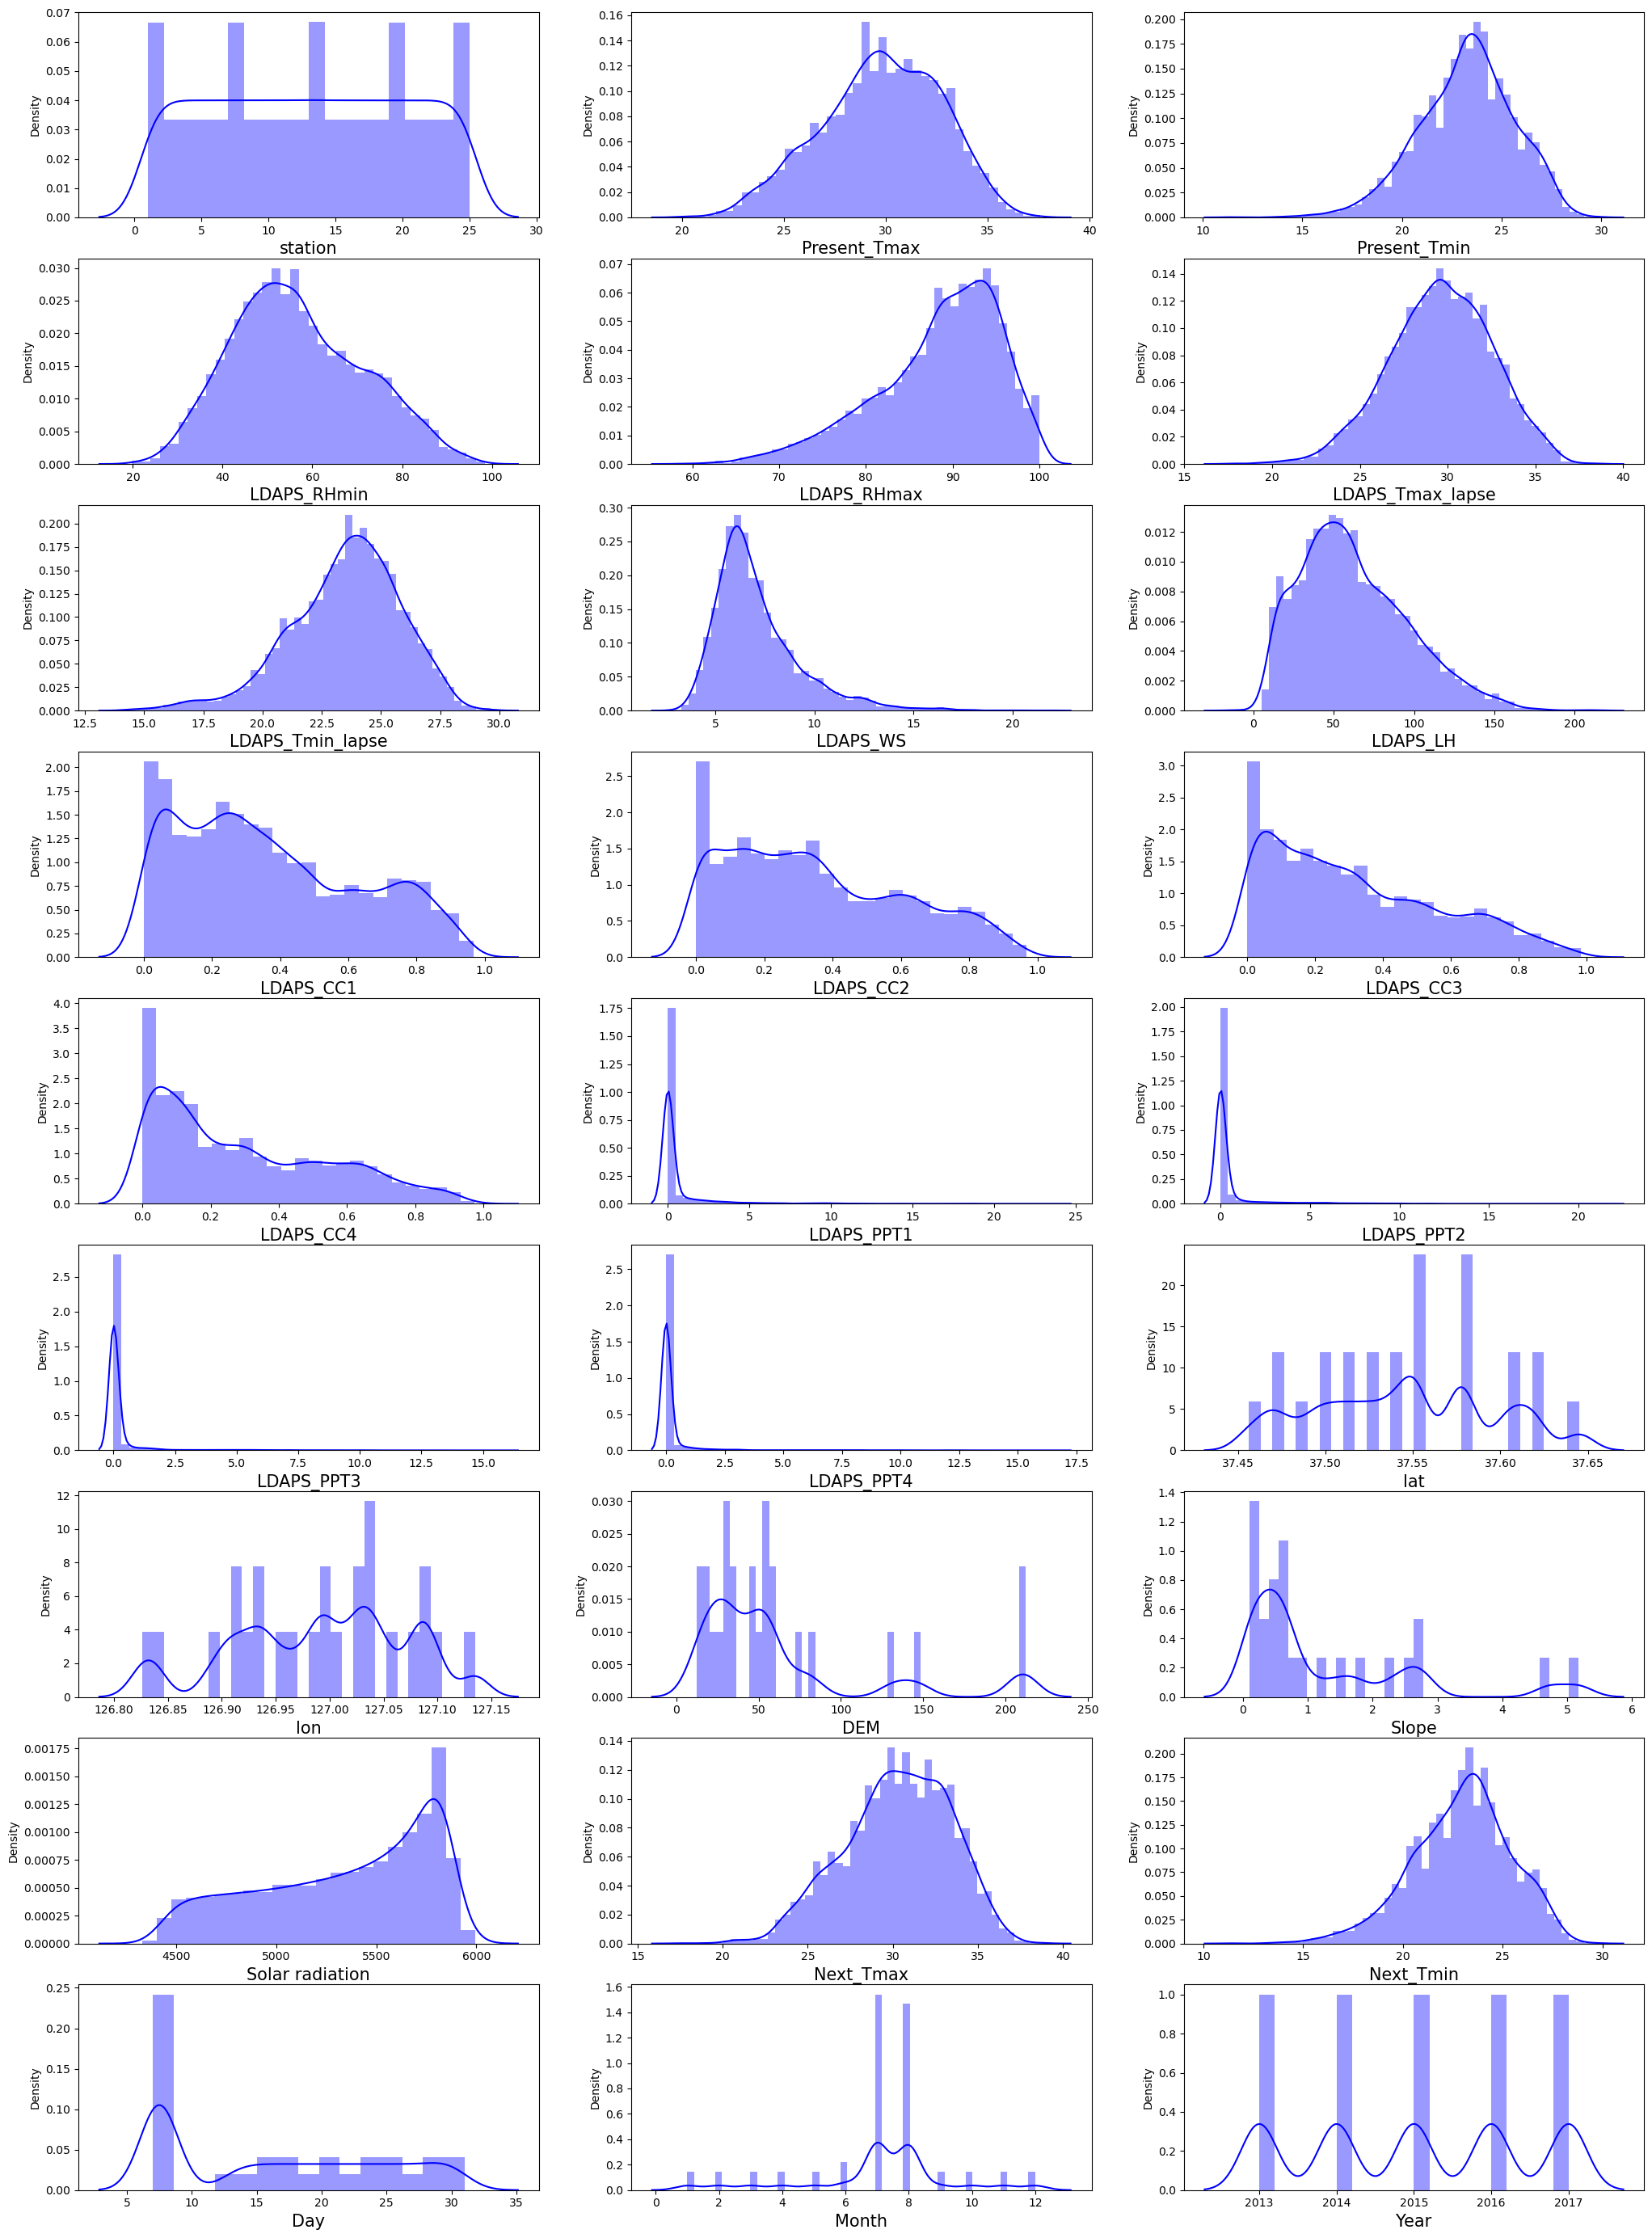

In [14]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in df_temp:
    if plotnumber <= 27:
        ax=plt.subplot(9,3,plotnumber)
        sns.distplot(df_temp[column],color='b')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

From above we can observe
- The data in target variables(Next_Tmax and Next_Tmin) seems to have normally distributed.
- in some column data seems to be normally distributed whereas in some columns not normally distributed seems to have outliers.we will check outliers later.

### Visualizatoon of features relationship with our two targets('Next_Tmax','Next_Tmin')

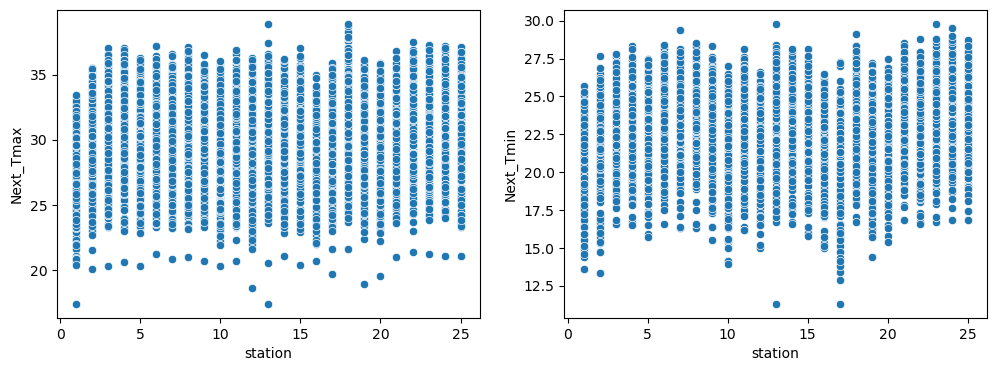

In [17]:
#scatterplot for station vs Next_Tmax and Next_Tmin 
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'station', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'station', y = 'Next_Tmin', data = df_temp)
plt.show()

- There are are 25 stations from which the weather report has been collected.  
- From the above plots it seems like there is no strong relationship between both of our targets with the feature station.

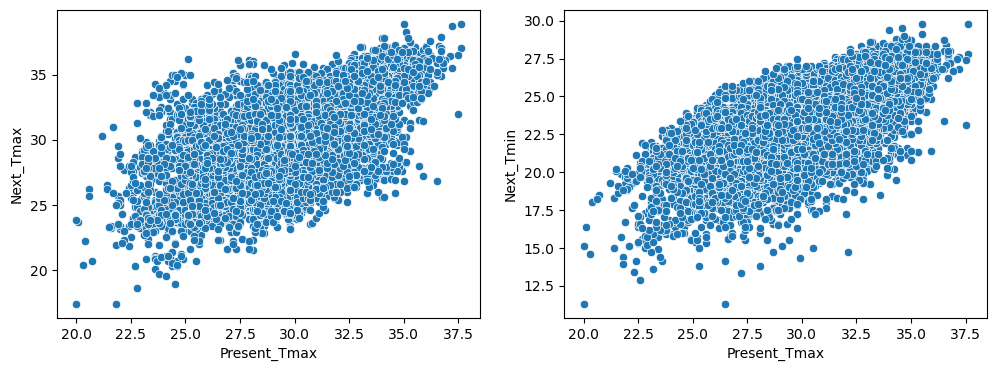

In [18]:
# scatterplots for Present_Tmax vs Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Present_Tmax', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Present_Tmax', y = 'Next_Tmin', data = df_temp)
plt.show()

- Present_Tmax column contains data of maximum temperature for a particular date.
- Present_Tmax shows positive correlation with Next_Tmax , Next_Tmax.

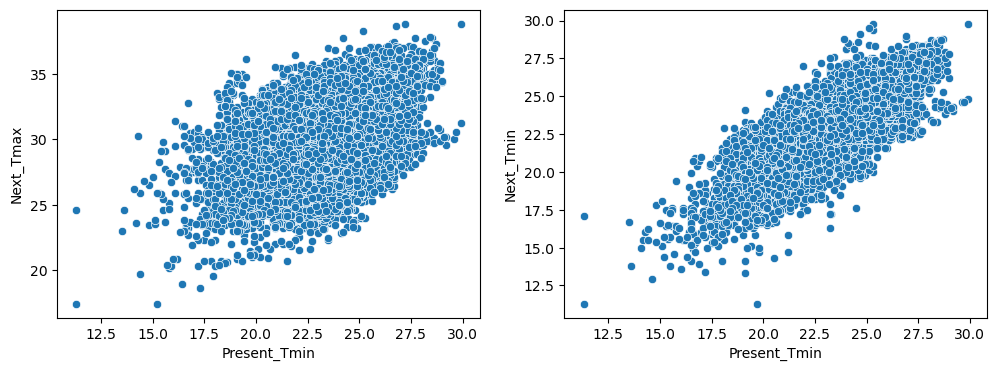

In [19]:
#scatterplots for Present_Tmin vs Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Present_Tmin', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Present_Tmin', y = 'Next_Tmin', data = df_temp)
plt.show()

- Present_Tmin column contains data of minimum temperature for a particular date.
- Present_Tmin also shows positive correlation with Next_Tmax , Next_Tmax.

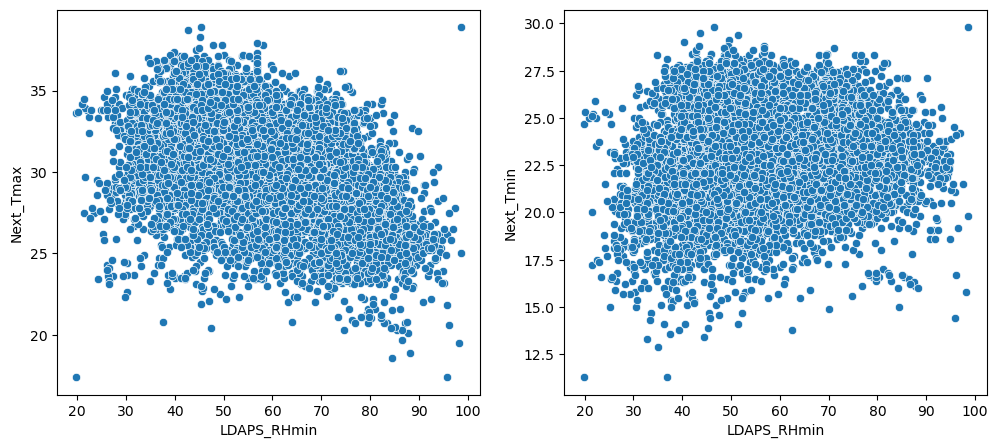

In [20]:
# scatterplots for LDAPS_RHmin with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_RHmin', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_RHmin', y = 'Next_Tmin', data = df_temp)
plt.show()

- Column LDAPS_RHmin contains data of forecast of next-day minimum relative humidity in percentage(%): 19.8 to 98.5  
- When LDAPS_RHmin increses Next_Tmax goes down means negatively correlated whereas it is positively correlated with Next_Tmin. 

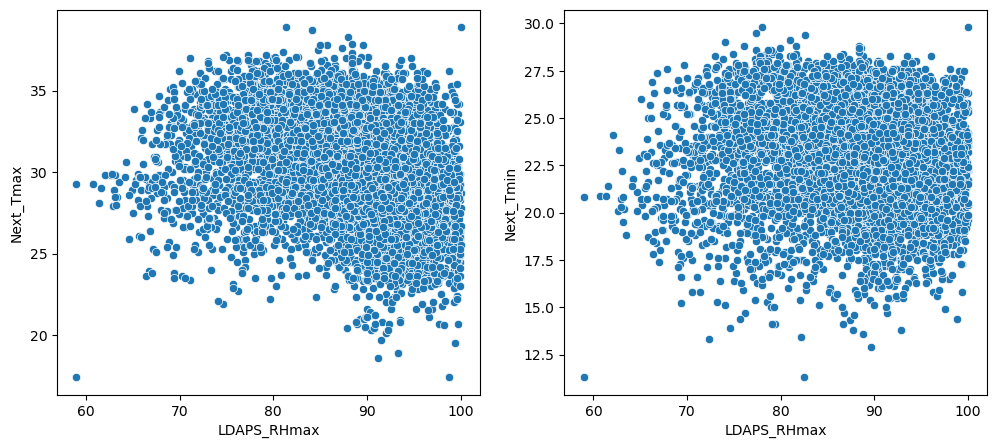

In [22]:
#scatterplots for LDAPS_RHmax with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_RHmax', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_RHmax', y = 'Next_Tmin', data = df_temp)
plt.show()

- Column LDAPS_RHmax contains data of forecast of next-day maximum relative humidity in percentage(%):58.9 to 100.
- Here we can see both Next_Tmax and Next_Tmin are high when the humidity %age is high.

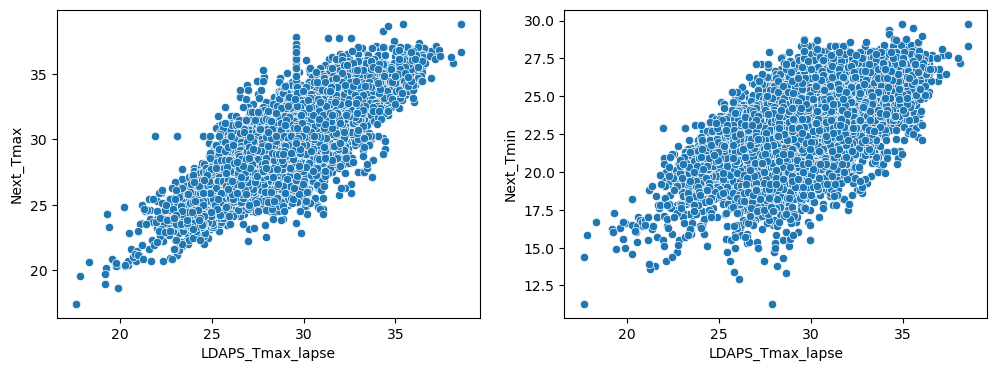

In [23]:
#scatterplots for LDAPS_Tmax_lapse with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_Tmax_lapse', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_Tmax_lapse', y = 'Next_Tmin', data = df_temp)
plt.show()

- LDAPS_Tmax_lapse is forecast of next-day maximum air temperature applied lapse rate.
- It has positive relationship with both the targets.

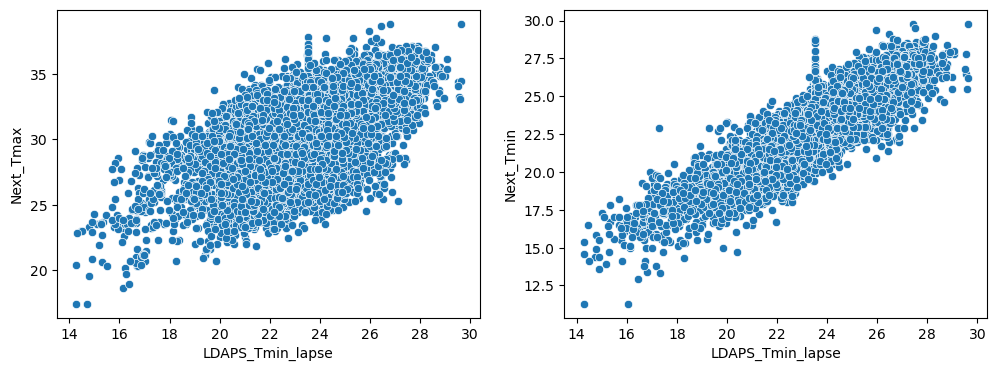

In [24]:
#scatterplots for LDAPS_Tmin_lapse with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_Tmin_lapse', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_Tmin_lapse', y = 'Next_Tmin', data = df_temp)
plt.show()

- LDAPS_Tmin_lapse is forecast of next-day minimum air temperature applied lapse rate.
- It is positively correlated with both the targets.

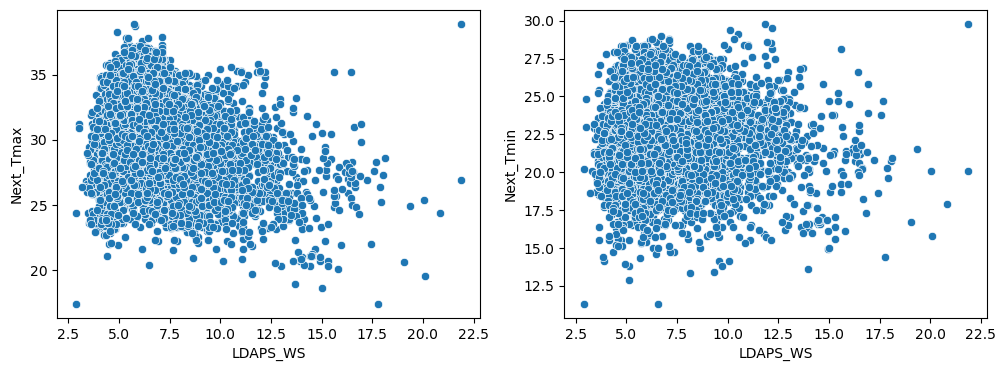

In [25]:
#Scatterplots for LDAPS_WS with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_WS', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_WS', y = 'Next_Tmin', data = df_temp)
plt.show()

- LDAPS_WS is having data related to forecast of next-day average wind speed (m/s).
- By the plots we can say the wind speed is mostly distributed in the range btween 2.5 to 12.5 m/s.

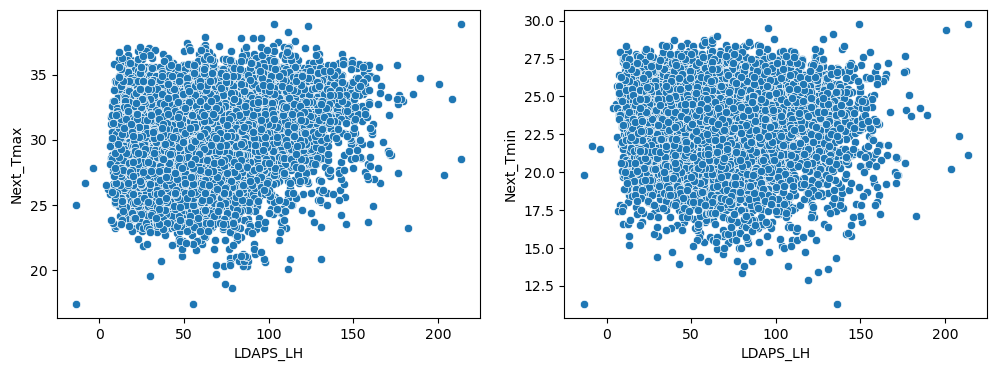

In [26]:
#Scatterplots for LDAPS_LH with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_LH', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_LH', y = 'Next_Tmin', data = df_temp)
plt.show()

- LDAPS_LH represents LDAPS model forecast of next-day average latent heat flux (W/m2).
- It is observed that LDAPS_LH is mostly distributed in the range of 10 to 150 W/m2.

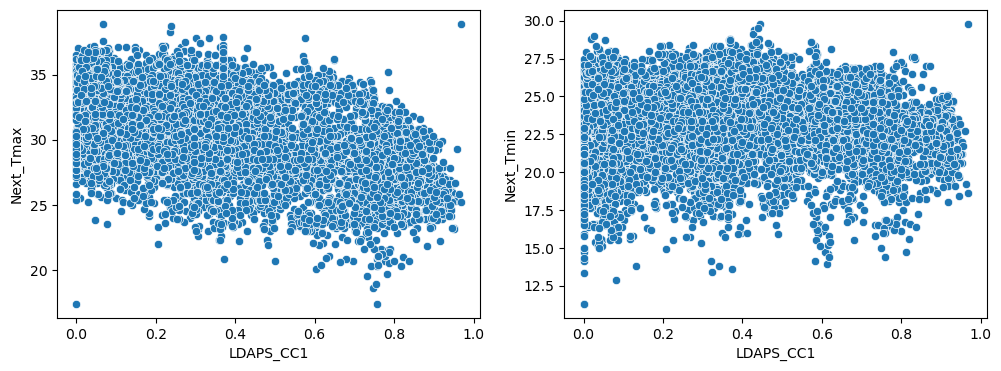

In [27]:
#scatterplots for LDAPS_CC1 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_CC1', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_CC1', y = 'Next_Tmin', data = df_temp)
plt.show()

- LDAPS_CC1 represents LDAPS model forecast of next-day 1st 6-hour split average cloud cover in percentage. 
- From above plots we can observe that Next_Tmax goes on decreasing as LDAPS_CC1 percentage increases. 
- But there is no any significant relationship between LDAPS_CC1 and Next_Tmin is observed.

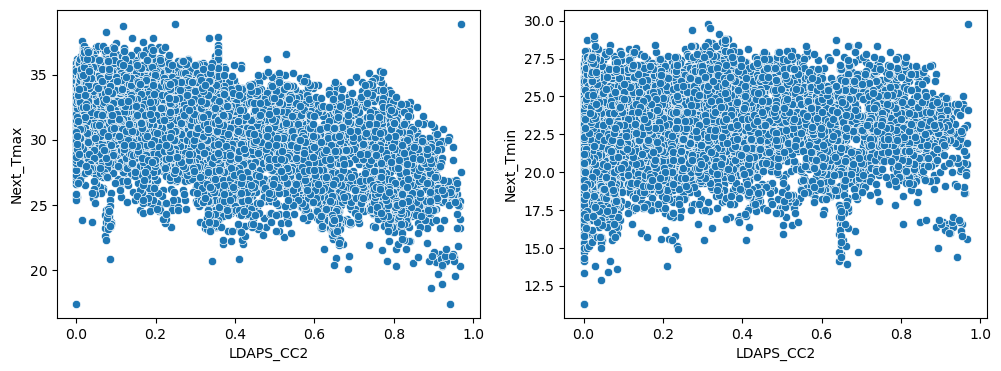

In [28]:
#scatterplots for LDAPS_CC2 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_CC2', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_CC2', y = 'Next_Tmin', data = df_temp)
plt.show()

- LDAPS_CC1 represents LDAPS model forecast of next-day 2nd 6-hour split average cloud cover in percentage.
- From above plots we can observe that Next_Tmax goes on decreasing as LDAPS_CC2 percentage increases. 
- But there is no any significant relation between LDAPS_CC2 and Next_Tmin is observed.

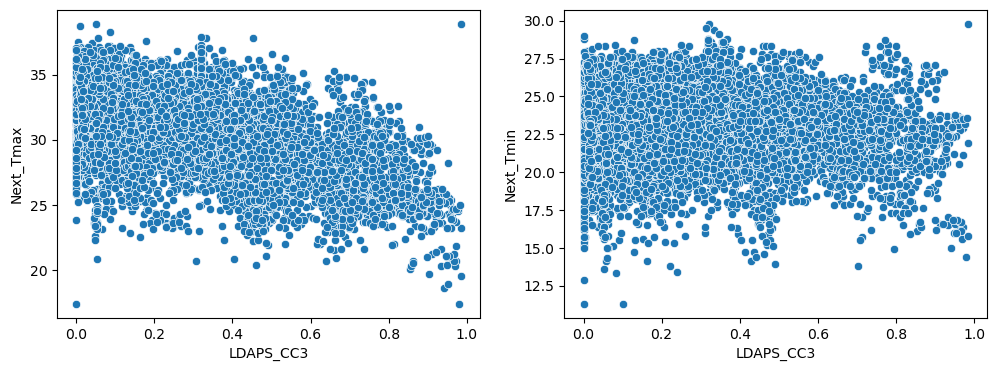

In [30]:
#scatterplots for LDAPS_CC3 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_CC3', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_CC3', y = 'Next_Tmin', data = df_temp)
plt.show()

- LDAPS_CC3 represents LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) in percentage.
- we can say there is a decrease in next day maximum temperature as LDAPS_CC3 increases, and the Next_Tmax is less than 20 degree in the range 0.8 to 1.0 of LDAPS_CC3.
- No any significant relation is observed beween Next_Tmin and LDAPS_CC3.

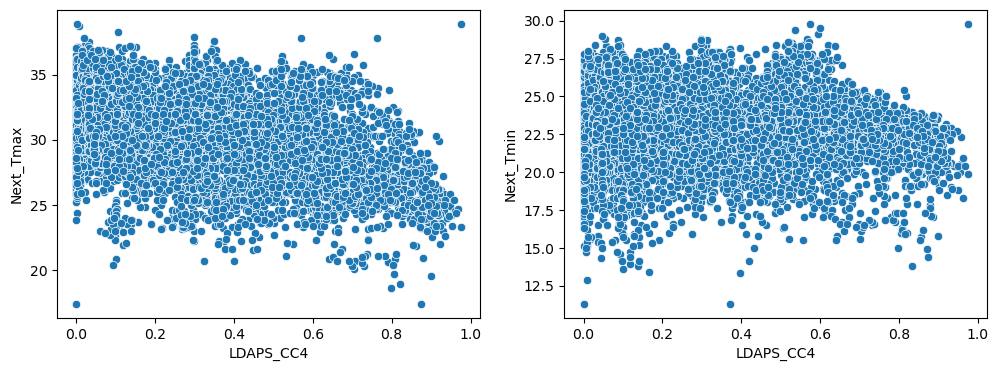

In [31]:
#Scatterplots for LDAPS_CC4 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_CC4', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_CC4', y = 'Next_Tmin', data = df_temp)
plt.show()

- LDAPS_CC4 represents LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) in percentage.
- when LDAPS_CC4 is increasing both the targets values are decreasing.

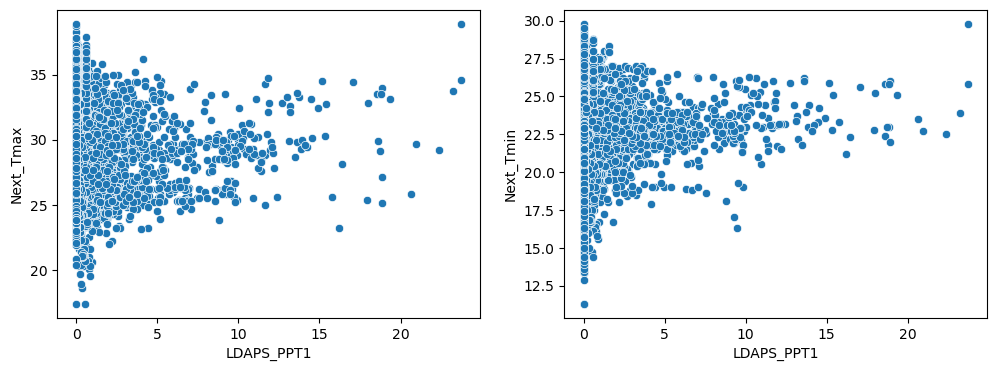

In [32]:
#scatterplots for LDAPS_PPT1 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_PPT1', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_PPT1', y = 'Next_Tmin', data = df_temp)
plt.show()

- LDAPS_PPT1 represents LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h)in percentage.
- here we can see LDAPS_PPT1 is mostly in between 0-5%, as it goes above 5% the Next_Tmax is above 23 degree.
- In case of of Next_Tmin as LDAPS_PPT1 goes above 5% the Next_Tmin is above 18 degree.

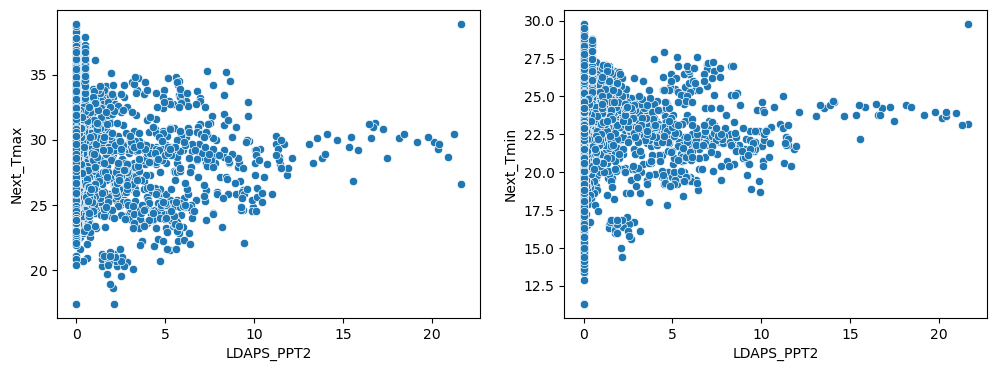

In [33]:
#Scatterplots for LDAPS_PPT2 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_PPT2', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_PPT2', y = 'Next_Tmin', data = df_temp)
plt.show()

- LDAPS_PPT2 represents LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h)in percentage.
- In this duration the Next_Tmax is mostly above 20 degree.
- In case of Next_Tmin as precipitation is above 10% the Next_Tmin will be in between 20 to 25 degree.

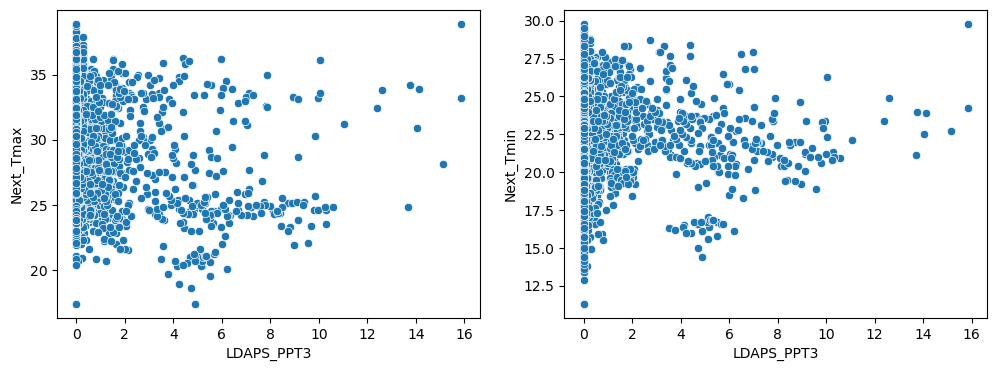

In [34]:
#scatterplots for LDAPS_PPT3 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_PPT3', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_PPT3', y = 'Next_Tmin', data = df_temp)
plt.show()

- LDAPS_PPT3 represents LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) in percentage. 
- Both of the plots are not showing any strong relationship with the target variables.

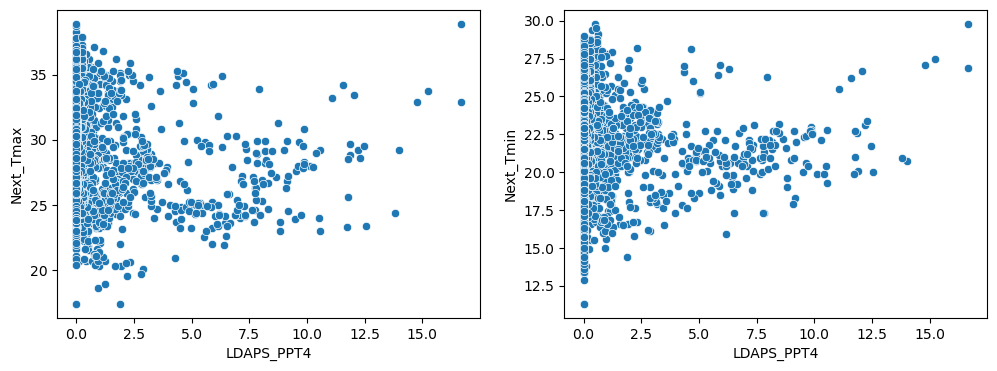

In [35]:
#scatterplots for LDAPS_PPT4 with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_PPT4', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_PPT4', y = 'Next_Tmin', data = df_temp)
plt.show()

- LDAPS_PPT4 represents LDAPS model forecast of next-day 4rd 6-hour split average precipitation (18-23 h) in percentage.
- Above 2.5% of LDAPS_PPT4 we observe some linear relationship with both the cases.

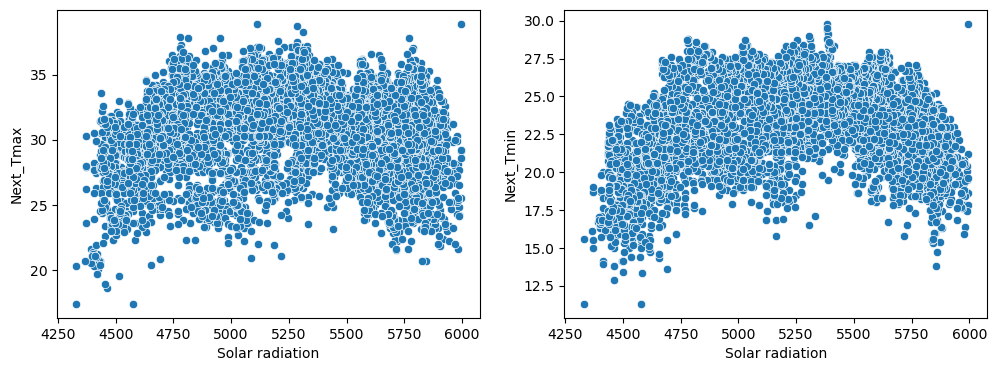

In [36]:
# Scatterplots for Solar radiation with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Solar radiation', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Solar radiation', y = 'Next_Tmin', data = df_temp)
plt.show()

- Solar radiations are daily incoming solar radiation (wh/m2).
- From both the plots we can obsrve that temperature is higher when the solar radiations are in range 4750 to 5500, .

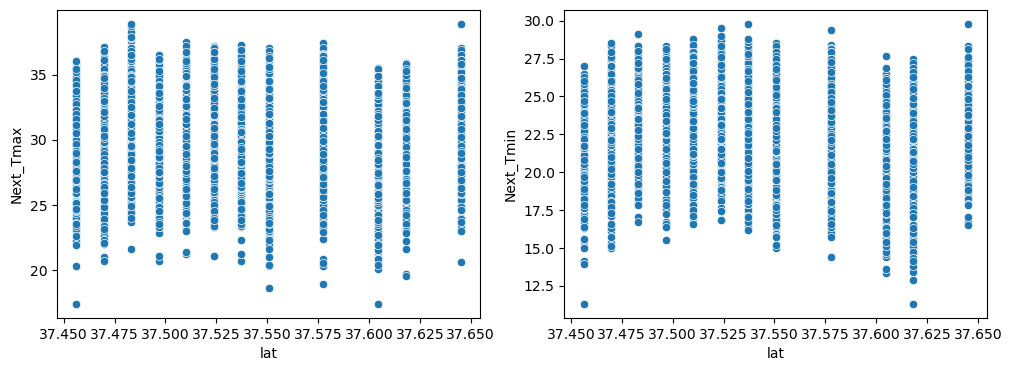

In [37]:
# Scatterplots for lat with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'lat', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'lat', y = 'Next_Tmin', data = df_temp)
plt.show()

- lat - Latitude (Â°) is from  37.456 to 37.645
- Here we can see there is no strong relationship of lat with both the targets.

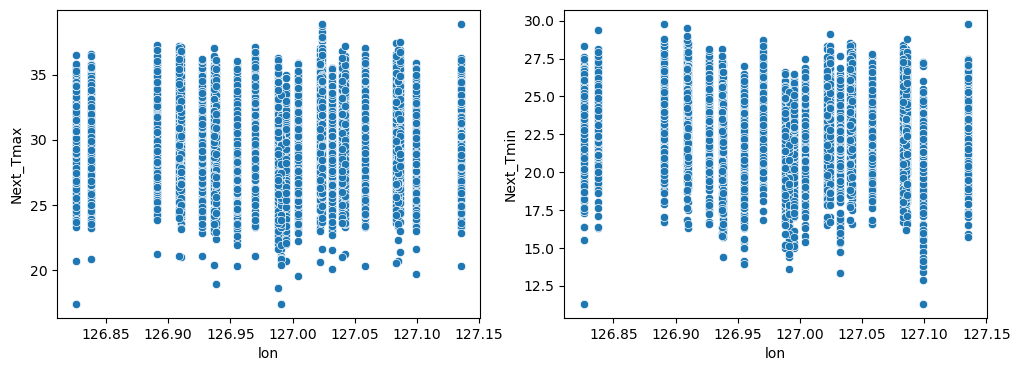

In [38]:
# Scatterplots for lon with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'lon', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'lon', y = 'Next_Tmin', data = df_temp)
plt.show()

- lon - Longitude (Â°)is from 126.826 to 127.135
- Here we can see there is no strong relationship of lon with both the targets.

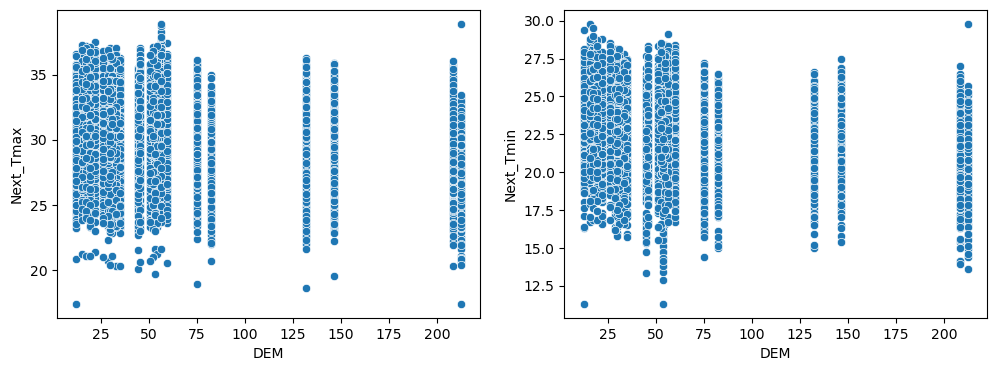

In [39]:
# Scatterplots for DEM with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'DEM', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'DEM', y = 'Next_Tmin', data = df_temp)
plt.show()

- DEM - Elevation (m): 12.4 to 212.3
- It has no strong relation with both the targets.

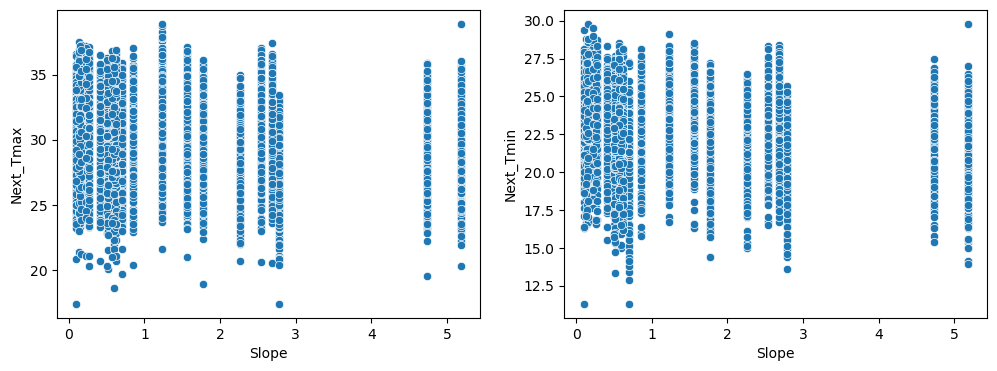

In [40]:
# Scatterplots for Slope with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Slope', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Slope', y = 'Next_Tmin', data = df_temp)
plt.show()

- Slope - Slope (Â°) ranges from 0.1 to 5.2
- We can see from slope range 3 to 4.5 both the target temperature are absent slope has no strong relation with the targets.

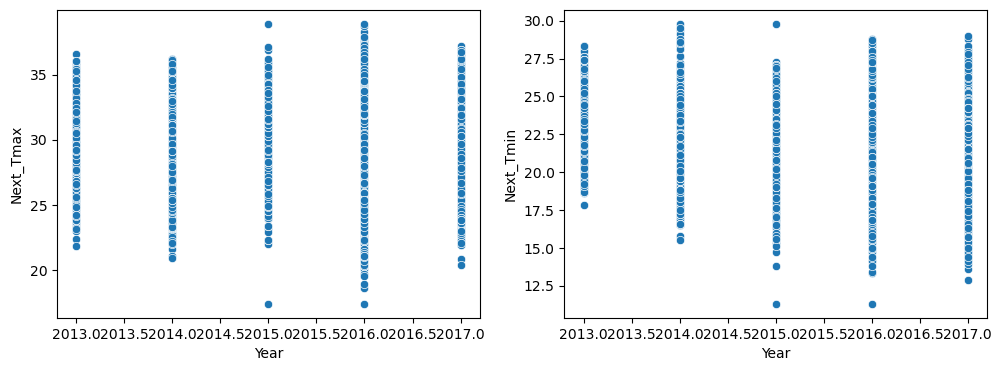

In [41]:
# Scatterplots for Year with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Year', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Year', y = 'Next_Tmin', data = df_temp)
plt.show()

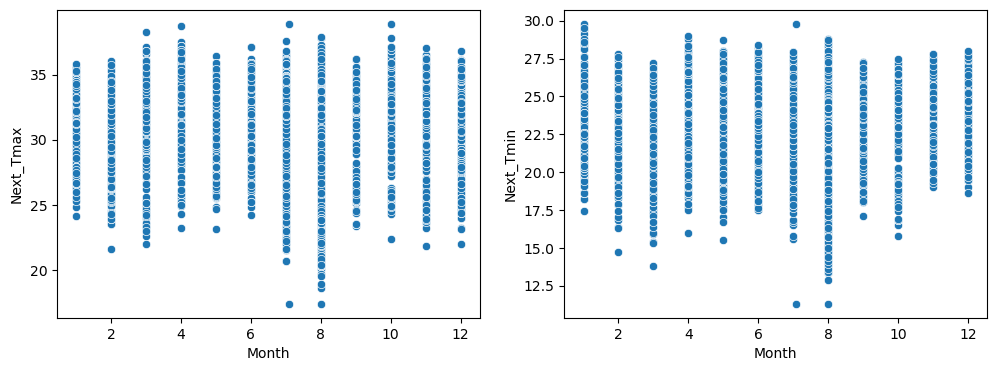

In [42]:
# Scatterplots for Year with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Month', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Month', y = 'Next_Tmin', data = df_temp)
plt.show()

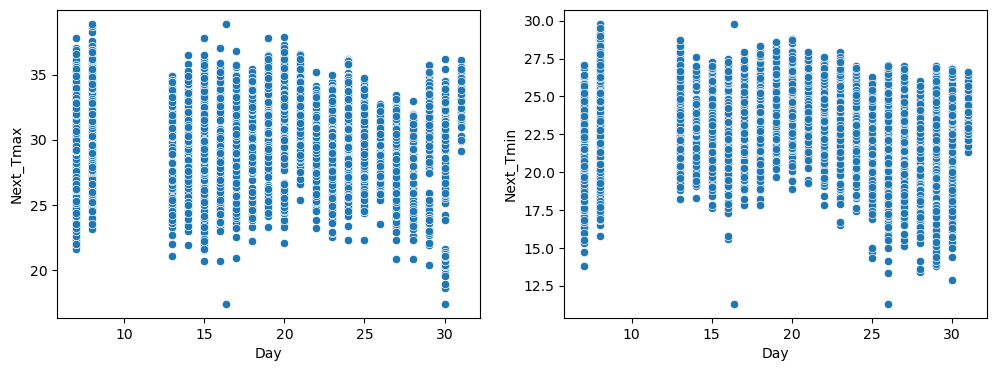

In [43]:
# Scatterplots for Day with Next_Tmax and Next_Tmin
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Day', y = 'Next_Tmax', data = df_temp)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Day', y = 'Next_Tmin', data = df_temp)
plt.show()

Columns Year, Month,Day have no strong relationship with the targets.So we can drop them.

In [44]:
#Dropping out the unrequired columns
df_temp.drop(['Year','Month','Day'], axis=1, inplace=True)

In [45]:
df_temp.shape

(7752, 24)

### Visualizing the outliers using boxplot

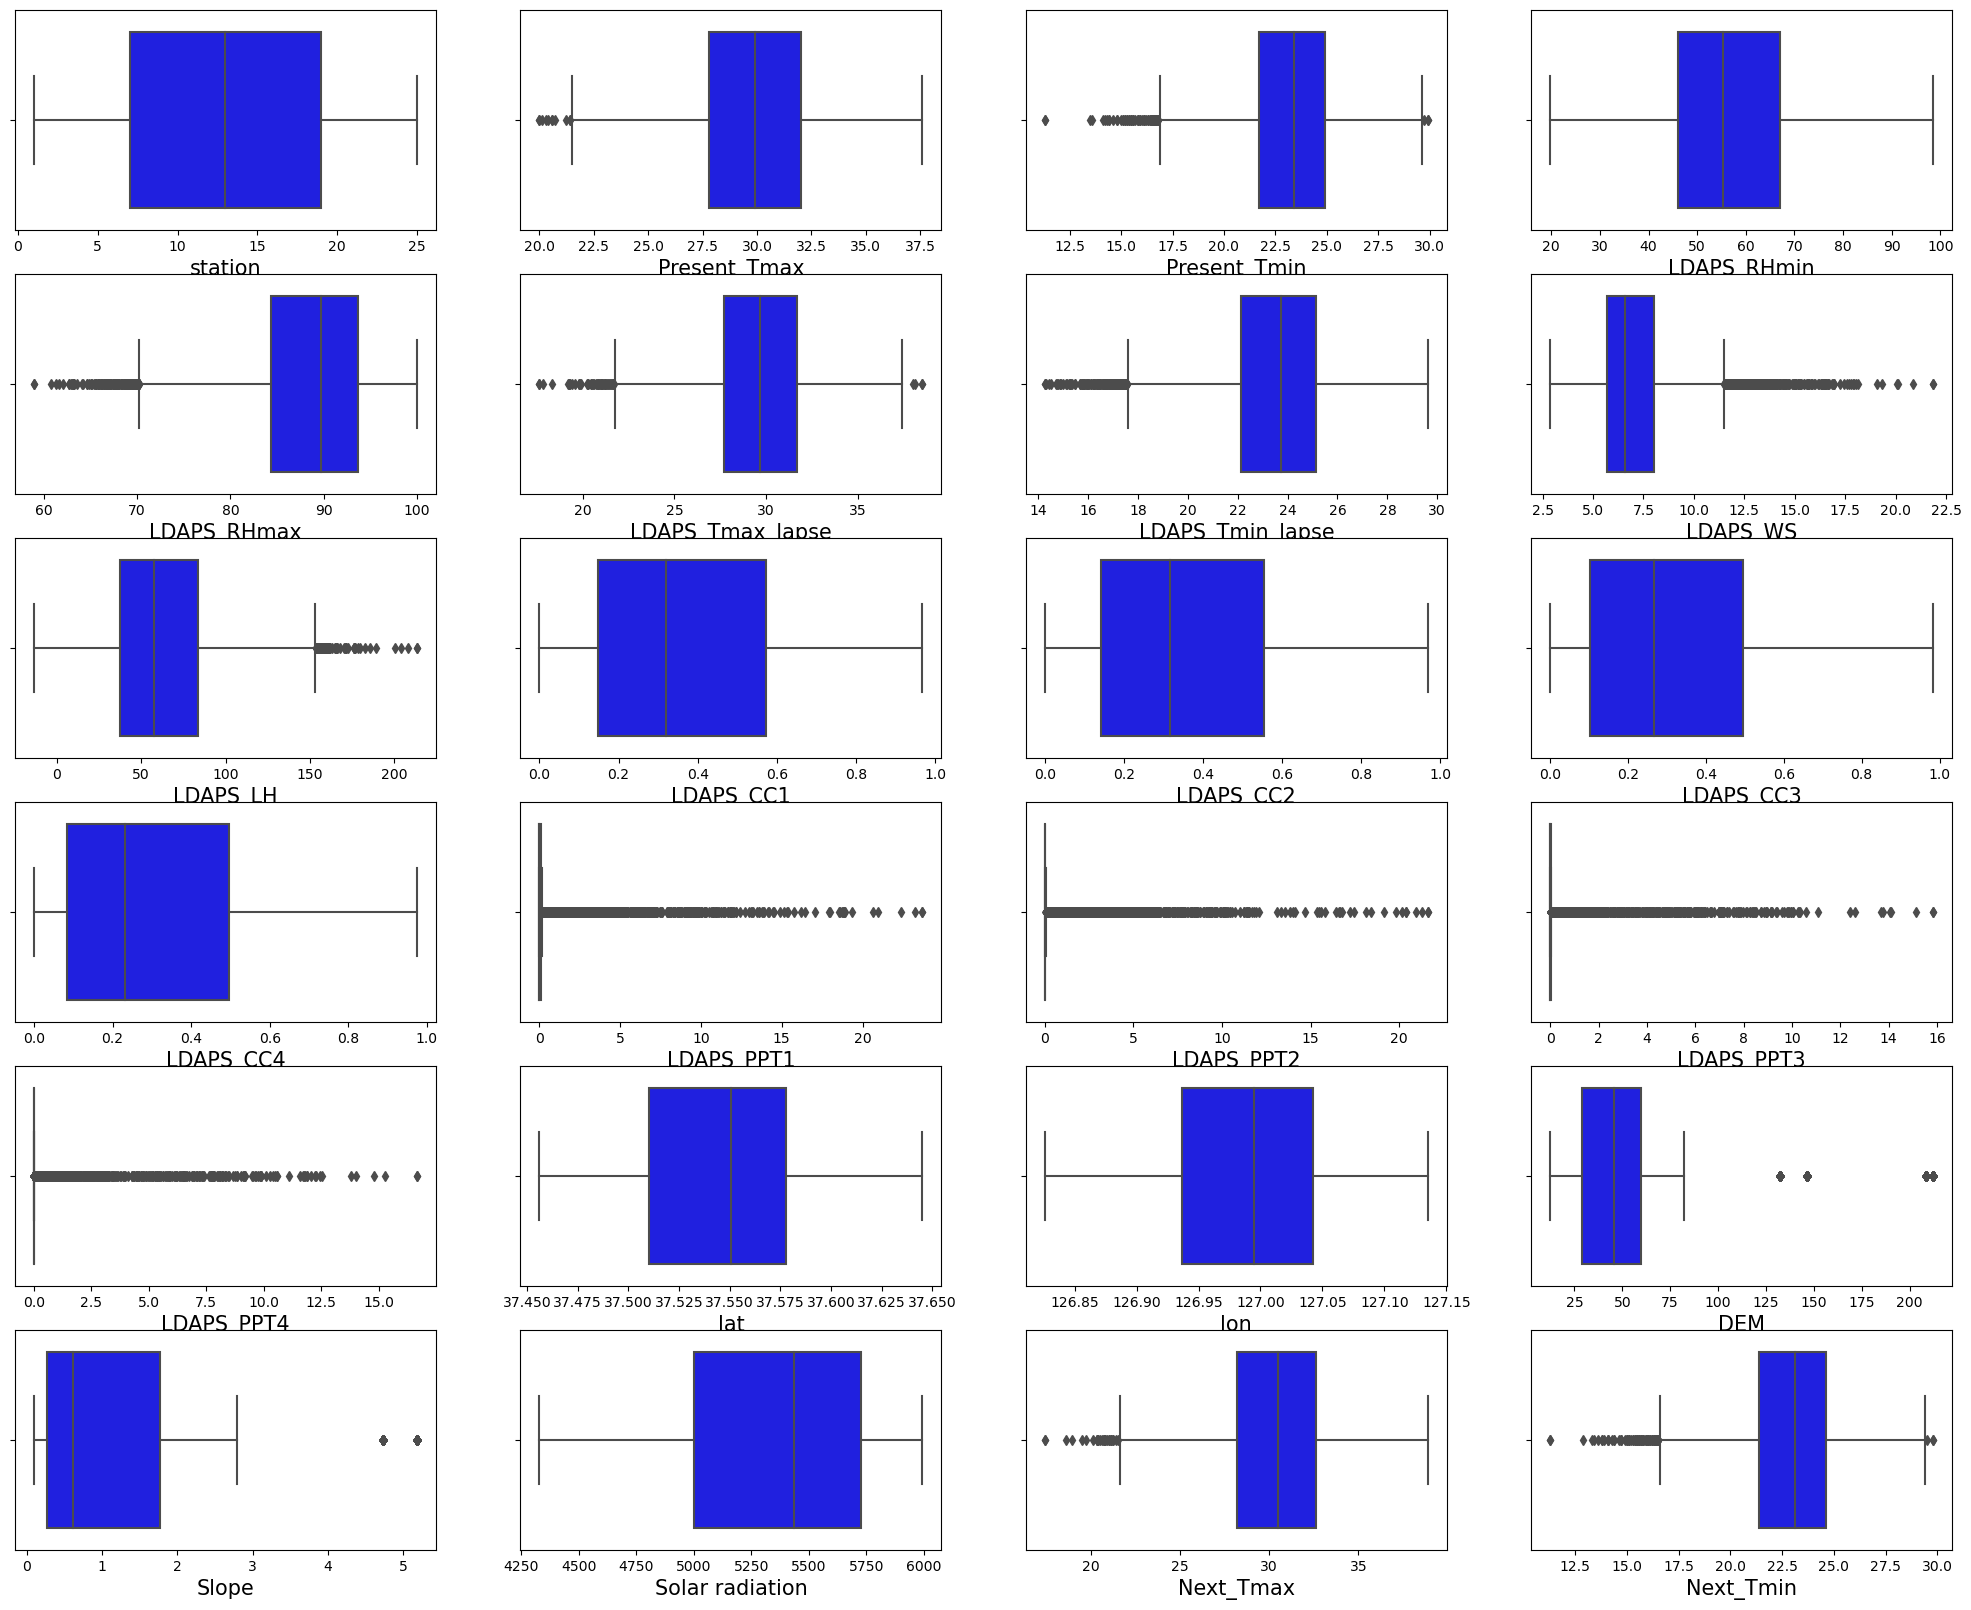

In [47]:
plt.figure(figsize=(25,20),facecolor='white')
graph=1
for column in df_temp:
    if graph <= 24:
        ax=plt.subplot(6,4,graph)
        sns.boxplot(df_temp[column],color='b')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In the boxplot we can notice the outliers present in some columns.
we will not investigate Next_Tmax and Next_Tmin columns as these are our targets/ labels.
Let's remove outliers from other columns using Zscore method.

In [48]:
from scipy.stats import zscore
z=zscore(df_temp[['Present_Tmax', 'Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM']])
abs_z=np.abs(z)
df_temp=df_temp[(abs_z<3).all(axis=1)]  #3-std deviation data
df_temp.shape

(6907, 24)

Before the size was (7752, 24).

### Correlation matrix using HeatMap

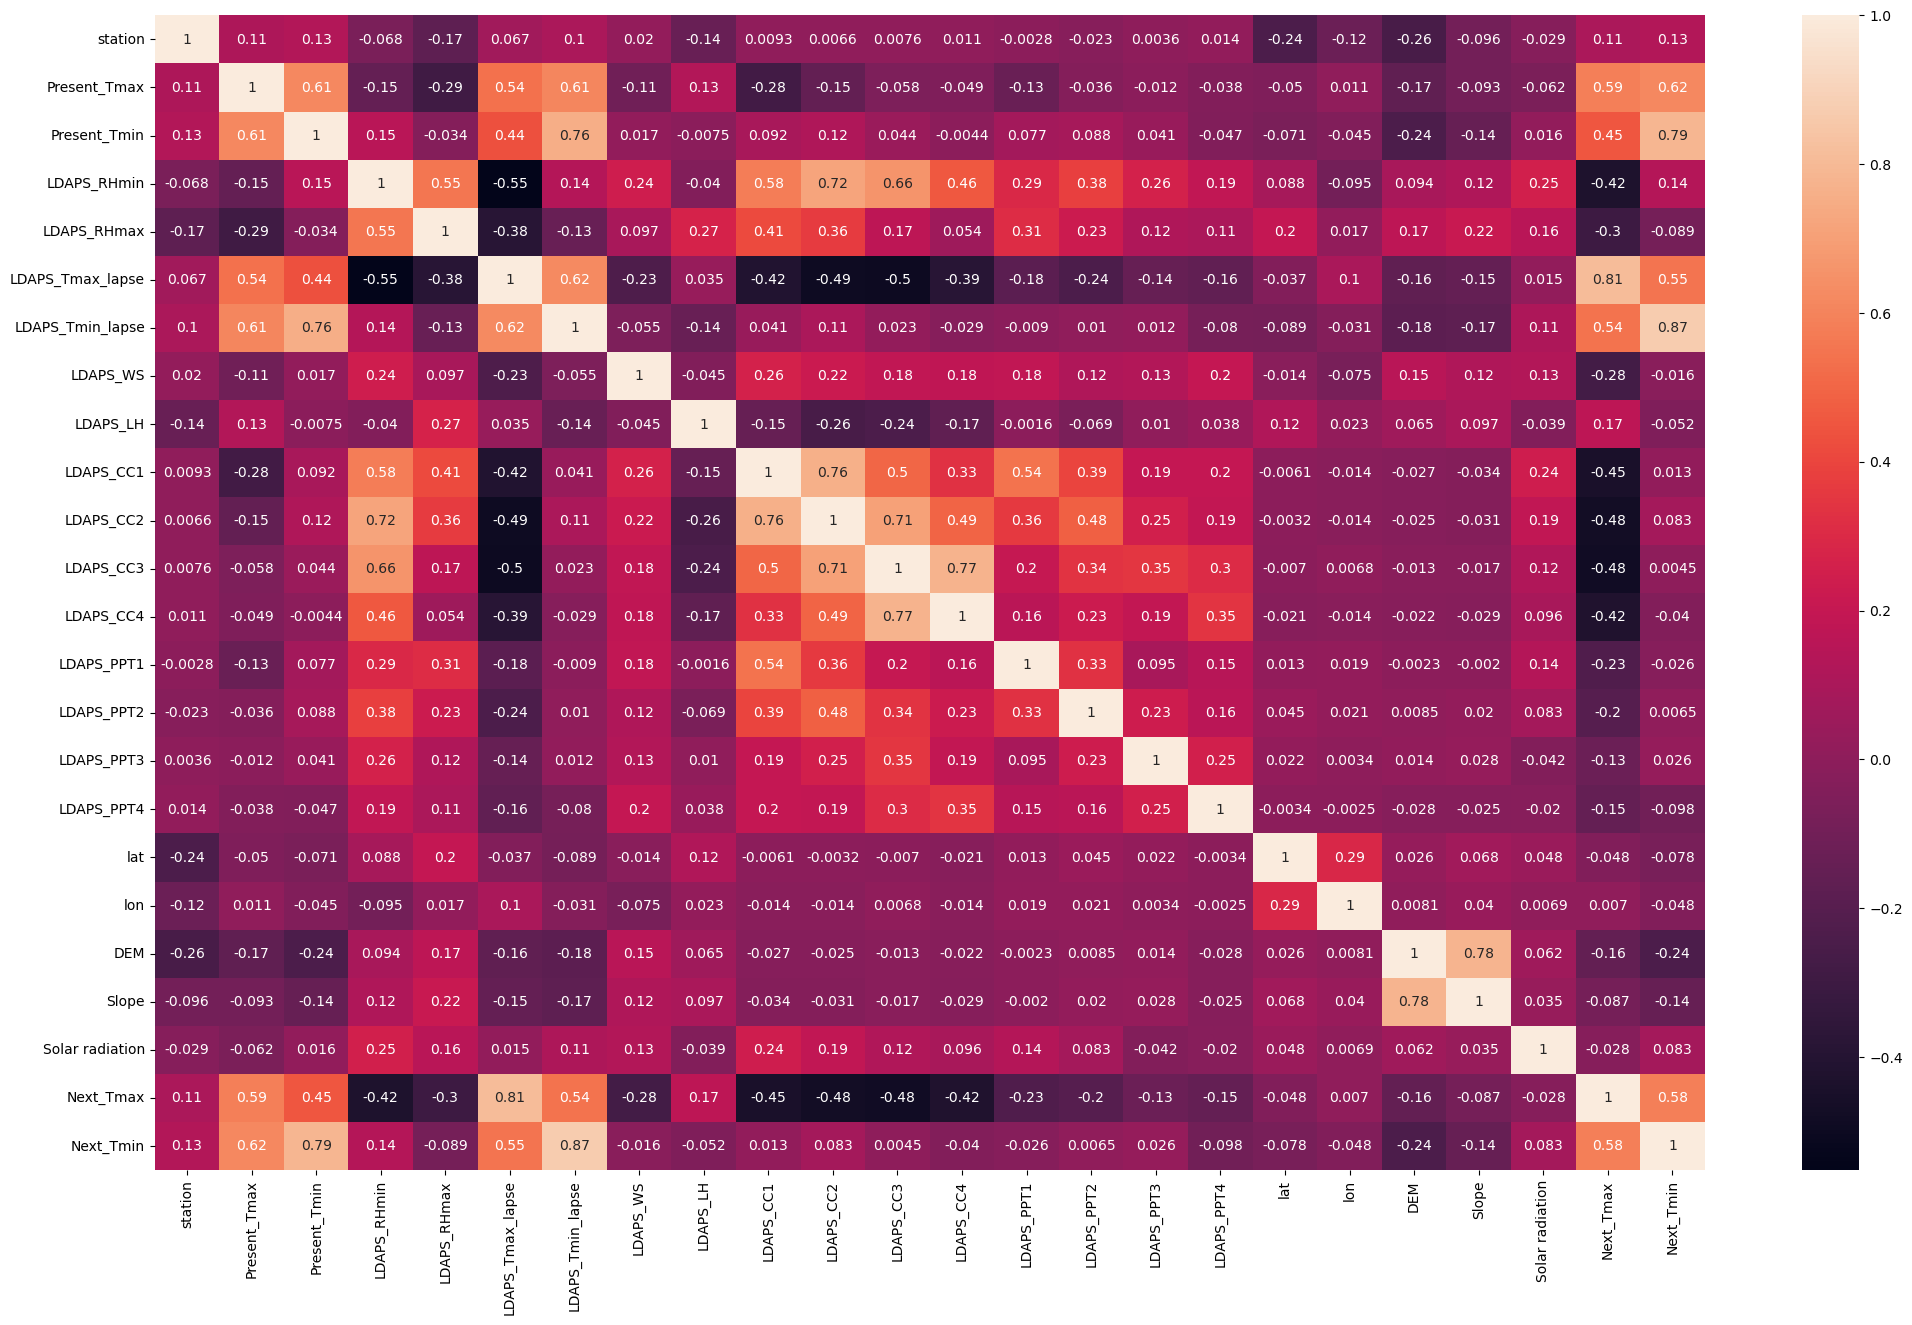

In [49]:
plt.figure(figsize=(25,15))
sns.heatmap(df_temp.corr(), annot = True)
plt.show()

From the correlation matrix, we can see the correlation between all the features and the features and targets.

### Visualizing the correlation between label and features using plot

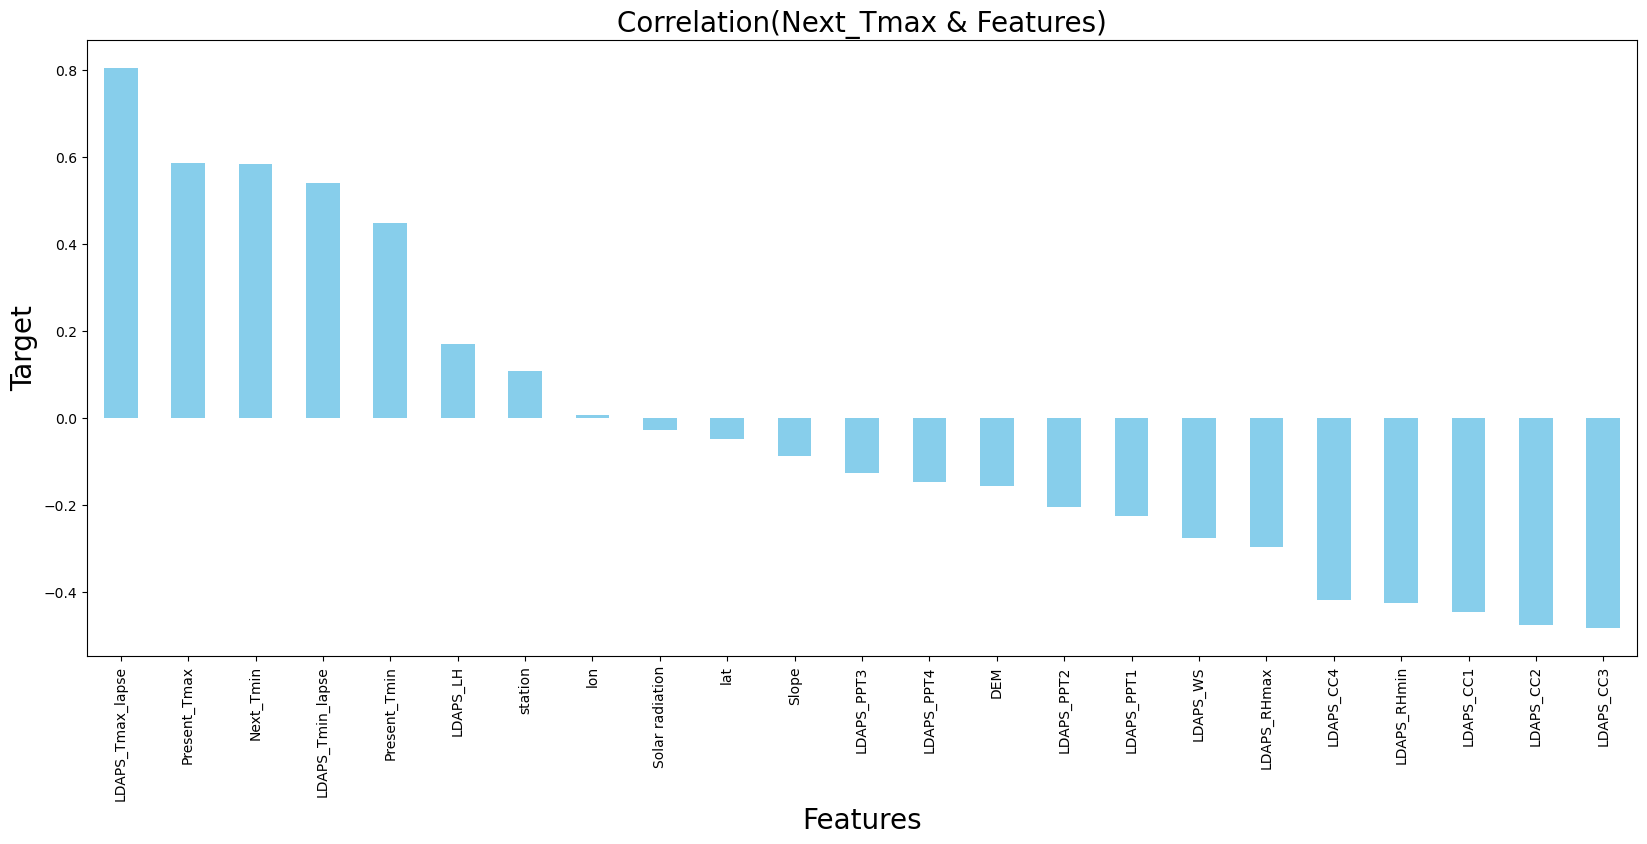

In [50]:
# visualization of target "Next_Tmax" with other features in plots
plt.figure(figsize =(20, 8))
df_temp.corr()['Next_Tmax'].sort_values(ascending = False).drop(['Next_Tmax']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation(Next_Tmax & Features)',fontsize=20)
plt.show()

From above plot we can see the positive negative correlated features with the target "Next_Tmax".

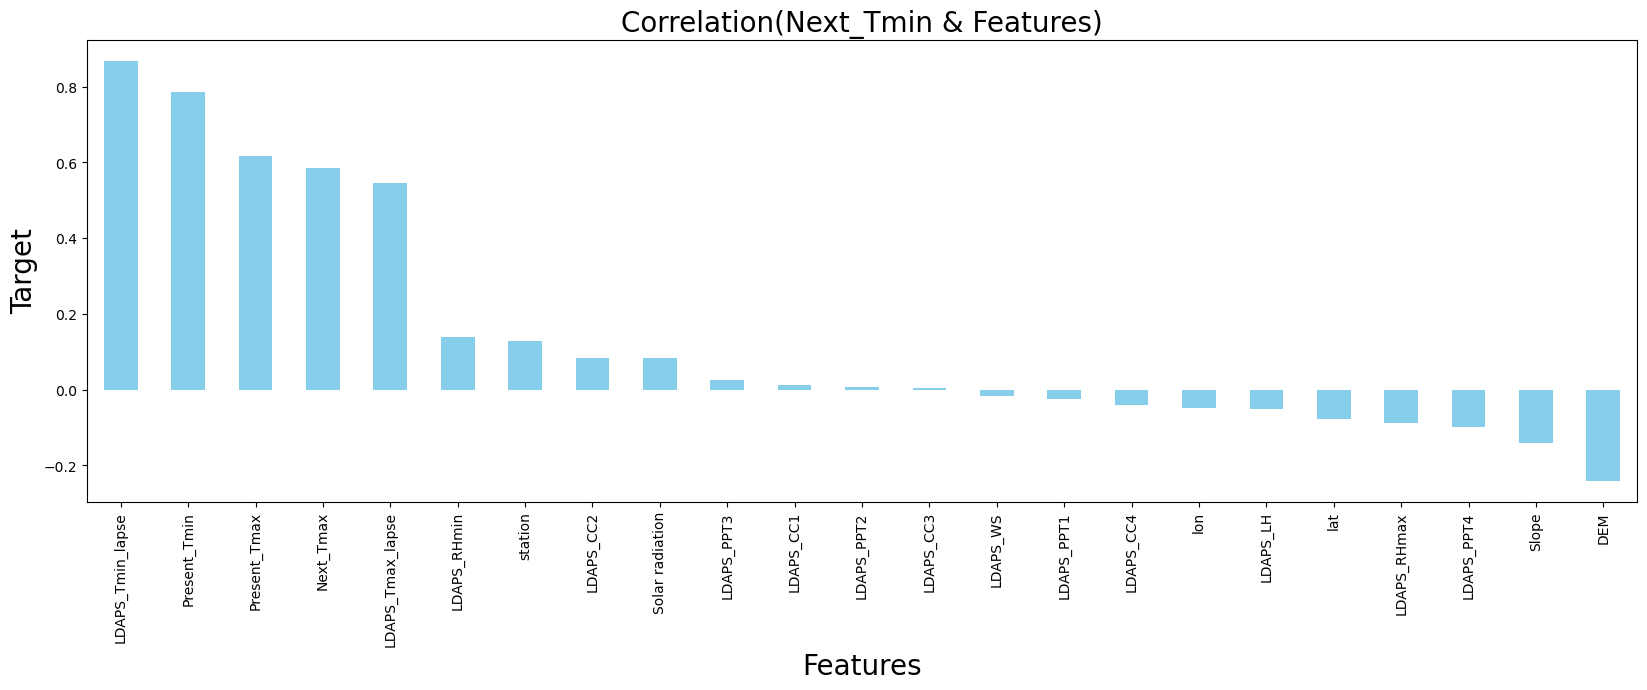

In [51]:
# visualization of target "Next_Tmin" with other features in plots
plt.figure(figsize =(20, 6))
df_temp.corr()['Next_Tmin'].sort_values(ascending = False).drop(['Next_Tmin']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation(Next_Tmin & Features)',fontsize=20)
plt.show()

From above plot we can see the positive negative correlated features with the target "Next_Tmin".

## Machine Learning Model Building For  "Next_Tmax"

### Separating the features and target

In [52]:
x = df_temp.drop(['Next_Tmax'],axis=1)  #Features
y = df_temp['Next_Tmax']   #Target

### Data Scaling using Standard Scaler

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [54]:
x1.head(2)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.671979      -0.43076     -0.821754     0.193211     0.437878   
1 -1.533033       0.68875     -0.735346    -0.240045     0.363875   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         -0.659354         -0.284272 -0.025697  0.223151  -0.444076  ...   
1         -0.010082          0.177244 -0.638520 -0.303591  -0.477748  ...   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0   -0.346288   -0.283871   -0.265549   -0.243502  1.212696  0.001303   
1   -0.346288   -0.283871   -0.265549   -0.243502  1.212696  0.516019   

        DEM     Slope  Solar radiation  Next_Tmin  
0  2.822820  1.143336         1.551286  -0.785463  
1 -0.305698 -0.536209         1.257647  -0.239035  

[2 rows x 23 columns]

### Checking VIF(variance Inflation Factor) for multicolinearity issue

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

vif_values          Features
0     1.231060           station
1     2.701570      Present_Tmax
2     3.306354      Present_Tmin
3     5.956387       LDAPS_RHmin
4     2.208452       LDAPS_RHmax
5     6.896867  LDAPS_Tmax_lapse
6     8.534173  LDAPS_Tmin_lapse
7     1.220593          LDAPS_WS
8     1.523889          LDAPS_LH
9     3.526472         LDAPS_CC1
10    4.696253         LDAPS_CC2
11    4.916946         LDAPS_CC3
12    2.716268         LDAPS_CC4
13    1.555872        LDAPS_PPT1
14    1.423076        LDAPS_PPT2
15    1.266145        LDAPS_PPT3
16    1.280552        LDAPS_PPT4
17    1.224237               lat
18    1.173944               lon
19    3.279594               DEM
20    3.018885             Slope
21    1.251275   Solar radiation
22    5.431327         Next_Tmin

From the above we can see there is no multicolinearity issue here(all vif_values<10).

### Splitting the data into Train and Test Set

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

Here using the 80% data for the training set and 20% data for the testing set.

## Model Building(Regression)

In [57]:
#Importing necessary libraries for model building
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Linear Regression

In [58]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [59]:
print('R2 Score(Training Accuracy) :'+ str(round(model1.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model1.score(x_test, y_test)*100))+'%')
# Model Evaluation
y_pred=model1.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :77%
R2 score(Testing Accuracy) :78%
MAE(Mean absolute Error) : 1.08
MSE(Mean Squared Error) : 1.92
RMSE(Root Mean squared Error) : 1.04


### Decision Tree Regressor

In [60]:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

DecisionTreeRegressor()

In [61]:
print('R2 Score(Training Accuracy) :'+ str(round(model2.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model2.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model2.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :100%
R2 score(Testing Accuracy) :75%
MAE(Mean absolute Error) : 1.04
MSE(Mean Squared Error) : 2.16
RMSE(Root Mean squared Error) : 1.02


### Random Forest Regressor

In [62]:
model3 = RandomForestRegressor()
model3.fit(x_train, y_train)

RandomForestRegressor()

In [63]:
print('R2 Score(Training Accuracy) :'+ str(round(model3.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model3.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model3.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :98%
R2 score(Testing Accuracy) :89%
MAE(Mean absolute Error) : 0.73
MSE(Mean Squared Error) : 0.95
RMSE(Root Mean squared Error) : 0.85


### GradientBoostingRegressor

In [64]:
model4 = GradientBoostingRegressor()
model4.fit(x_train, y_train)

GradientBoostingRegressor()

In [65]:
print('R2 Score(Training Accuracy) :'+ str(round(model4.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model4.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model4.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :86%
R2 score(Testing Accuracy) :84%
MAE(Mean absolute Error) : 0.90
MSE(Mean Squared Error) : 1.38
RMSE(Root Mean squared Error) : 0.95


### Cross- Validation

In [66]:
# Checking cv score for Linear Regression
print(cross_val_score(model1,x,y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print(cross_val_score(model2,x,y,cv=5).mean())

#Checking the cv score for Random Forest Regressor
print(cross_val_score(model3,x,y,cv=5).mean())

#Checking the cv score for GradientBoostingRegressor
print(cross_val_score(model4,x,y,cv=5).mean())

0.7031589095102407
0.4289694314521385
0.682023739483266
0.6956467007643553


As in Random Forest Regressor we are getting maximum R2 score and the difference between training and testing score is low here and by looking in cv score choosing it as our final model.

### Hyper Parameter Tuning

In [67]:
#RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[5,10],
             'max_depth':[2,3,4]}

In [68]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [69]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10]})

In [70]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 10}

In [71]:
Reg_model1 = RandomForestRegressor(criterion = 'mse',max_depth = 4,max_features = 'auto',n_estimators = 10)
Reg_model1.fit(x_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=4, n_estimators=10)

In [72]:
print('R2 Score(Training Accuracy) :'+ str(round(Reg_model1.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(Reg_model1.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=Reg_model1.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :74%
R2 score(Testing Accuracy) :72%
MAE(Mean absolute Error) : 1.21
MSE(Mean Squared Error) : 2.45
RMSE(Root Mean squared Error) : 1.10


May be we need to tune it some other way to have better efficiency.as for now i am saving the model before tuning.

### Saving the model

In [73]:
import joblib
joblib.dump(model3,"Temperature Forecast Analysis(Next_Tmax).pkl")

['Temperature Forecast Analysis(Next_Tmax).pkl']

## 2. Next_Tmin (Prediction)

### Separating the features and target

In [74]:
x_new = df_temp.drop(['Next_Tmin'],axis=1)  #Features
y_new = df_temp['Next_Tmin']   #Target

### Data Scaling using Standard Scaler

In [75]:
sc = StandardScaler()
x1_new = pd.DataFrame(sc.fit_transform(x_new), columns=x_new.columns)

In [76]:
x1_new.head(2)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.671979      -0.43076     -0.821754     0.193211     0.437878   
1 -1.533033       0.68875     -0.735346    -0.240045     0.363875   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         -0.659354         -0.284272 -0.025697  0.223151  -0.444076  ...   
1         -0.010082          0.177244 -0.638520 -0.303591  -0.477748  ...   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0   -0.346288   -0.283871   -0.265549   -0.243502  1.212696  0.001303   
1   -0.346288   -0.283871   -0.265549   -0.243502  1.212696  0.516019   

        DEM     Slope  Solar radiation  Next_Tmax  
0  2.822820  1.143336         1.551286  -0.496440  
1 -0.305698 -0.536209         1.257647  -0.019482  

[2 rows x 23 columns]

### Checking VIF(variance Inflation Factor) for multicolinearity issue

In [77]:
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1_new.values, i) for i in range(x1_new.shape[1])]
vif["Features"]=x1_new.columns
vif

vif_values          Features
0     1.237665           station
1     2.778940      Present_Tmax
2     3.030694      Present_Tmin
3     5.926424       LDAPS_RHmin
4     2.210896       LDAPS_RHmax
5     8.050988  LDAPS_Tmax_lapse
6     6.812149  LDAPS_Tmin_lapse
7     1.242262          LDAPS_WS
8     1.551445          LDAPS_LH
9     3.545266         LDAPS_CC1
10    4.699414         LDAPS_CC2
11    4.927799         LDAPS_CC3
12    2.772973         LDAPS_CC4
13    1.553971        LDAPS_PPT1
14    1.422671        LDAPS_PPT2
15    1.264820        LDAPS_PPT3
16    1.277003        LDAPS_PPT4
17    1.223320               lat
18    1.179871               lon
19    3.126550               DEM
20    2.950359             Slope
21    1.252760   Solar radiation
22    3.948099         Next_Tmax

From the above we can see there is no multicolinearity issue here(all vif_values<10).

### Splitting the dataset in Train and Test Set

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x1_new, y_new, test_size=0.2, random_state=45)

Here using the 80% data for the training set and 20% data for the testing set.

### Model Building(Regression)

### Linear Regression

In [79]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [80]:
print('R2 Score(Training Accuracy) :'+ str(round(model1.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model1.score(x_test, y_test)*100))+'%')
# Model Evaluation
y_pred=model1.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :84%
R2 score(Testing Accuracy) :84%
MAE(Mean absolute Error) : 0.76
MSE(Mean Squared Error) : 0.95
RMSE(Root Mean squared Error) : 0.87


### Decision Tree Regressor

In [81]:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

DecisionTreeRegressor()

In [82]:
print('R2 Score(Training Accuracy) :'+ str(round(model2.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model2.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model2.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :100%
R2 score(Testing Accuracy) :79%
MAE(Mean absolute Error) : 0.83
MSE(Mean Squared Error) : 1.24
RMSE(Root Mean squared Error) : 0.91


### Random Forest Regressor

In [83]:
model3 = RandomForestRegressor()
model3.fit(x_train, y_train)

RandomForestRegressor()

In [84]:
print('R2 Score(Training Accuracy) :'+ str(round(model3.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model3.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model3.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :99%
R2 score(Testing Accuracy) :90%
MAE(Mean absolute Error) : 0.57
MSE(Mean Squared Error) : 0.56
RMSE(Root Mean squared Error) : 0.75


### Cross- Validation

In [85]:
# Checking cv score for Linear Regression
print(cross_val_score(model1,x,y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print(cross_val_score(model2,x,y,cv=5).mean())

#Checking the cv score for Random Forest Regressor
print(cross_val_score(model3,x,y,cv=5).mean())

0.7031589095102407
0.4340724090085238
0.683933066682072


#### As in Linear Regression model the r2 score is 84% and the traing and testing score are very much close here and by looking into cv score choosing it as our final model.

#### We are not going for hyper parameter tuning as Linear Regression doesn't have any hyparameter.

### Saving the model

In [86]:
joblib.dump(model1,"Temperature Forecast Analysis(Next_Tmin).pkl")

['Temperature Forecast Analysis(Next_Tmin).pkl']

We have successfully saved our both regression model.